__Approach__
1. Data Understanding
2. Data Preperation
3. PCA
4. K-means clustering
5. Hierachical Clustering
6. Analysis

In [334]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [335]:
#Read the file
country_df = pd. read_csv("Country-data.csv")
country_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [336]:
# Checking the percentage of missing values
round(country_df.isnull().sum()/len(country_df.index),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [337]:
country_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No missing or null data

In [338]:
country_df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [339]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
country_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
90%    100.220000   70.800000   10.940000   75.420000   41220.000000   
95%    116.000000   80.570000   11.570000   81.140000   48290.000000   
99%    153.400000  160.480000   13.474000  146.080000   84374.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
90%     16.640000   80.400000    5.322000   41840.000000  
95%     20.870000   81.400000    5.861000   48610.000000  
99%     41.478000   82.370000    6.563600   79088.000000  
max    104.000000   82.800000    7.490000  105000.000000

__Based on the above two statements, clearly, there are outliers. We can check further if these are relevant outliers based on the business data or they need to be removed__

In [340]:
# Data Prep - convert %s into actual values for export, import and health columns
country_df['exports'] = country_df['exports']*country_df['gdpp']/100
country_df['imports'] = country_df['imports']*country_df['gdpp']/100
country_df['health'] = country_df['health']*country_df['gdpp']/100 

{'whiskers': [<matplotlib.lines.Line2D at 0x2073df5f7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2073df5fe80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2073df5f3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2073df68550>],
 'fliers': [<matplotlib.lines.Line2D at 0x2073df68898>],
 'means': []}

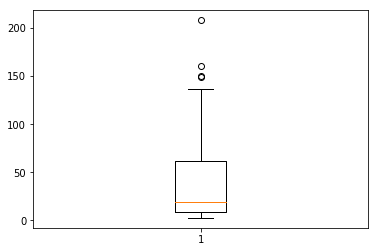

In [341]:
# 1. outlier check - Child Mortality
plt.boxplot(country_df['child_mort'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2073dfb3860>,
 'caps': [<matplotlib.lines.Line2D at 0x2073dfb3ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2073dfb3438>],
 'medians': [<matplotlib.lines.Line2D at 0x2073dfbc5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2073dfbc908>],
 'means': []}

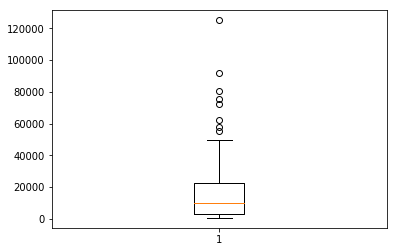

In [342]:
# 1. outlier check - Income
plt.boxplot(country_df['income'])

__As each row represents a different country, we cannot really call any data point an outlier. There is bound to be huge variance in some of the columns (income, child mortality etc.). Hence retaining all the data as is.__

In [343]:
# Standardization 
country_base_df = country_df #Base df, with unscaled values for analysis later
df = country_df.drop(['country'],1)
normalized_df=(df-df.mean())/df.std()
normalized_df['country'] = country_df['country']
country_df = normalized_df
country_df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.287660 -0.409779 -0.563346 -0.430979 -0.805822   0.156864   -1.614237   
1   -0.537333 -0.349141 -0.437901 -0.312737 -0.374243  -0.311411    0.645924   
2   -0.272015 -0.317571 -0.483372 -0.352660 -0.220182   0.786908    0.668413   
3    2.001787 -0.290501 -0.530767 -0.344915 -0.583289   1.382894   -1.175698   
4   -0.693548 -0.104019 -0.178234  0.040613  0.101427  -0.599944    0.702147   

   total_fer      gdpp              country  
0   1.897176 -0.677143          Afghanistan  
1  -0.857394 -0.484167              Albania  
2  -0.038289 -0.463980              Algeria  
3   2.121770 -0.514720               Angola  
4  -0.540321 -0.041692  Antigua and Barbuda

In [344]:
#Remove the categorical column for PCA
pca_df = country_df.drop(['country'],1)

In [345]:
#Perform PCA
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized',random_state = 42)
pca.fit(pca_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [346]:
#List of PCA components.
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [347]:
#Variance ratio
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

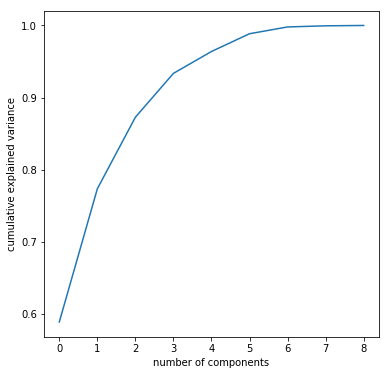

In [348]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

As seen above, 4 PCs explain about 95% variance and hence we can proceed with 4 PCs 

In [349]:
#Checking how the original variables are loaded against these PCs

colnames = list(country_df.columns)
colnames = colnames[:-1]
#colnames
pc_feature_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],
                                            'PC3':pca.components_[2],'PC4':pca.components_[3]})
pc_feature_df
#pca_df.shape

Feature       PC1       PC2       PC3       PC4
0  child_mort -0.316392  0.476267 -0.150012 -0.148052
1     exports  0.342887  0.397311 -0.030574  0.449425
2      health  0.358535  0.155053 -0.075703 -0.599712
3     imports  0.344865  0.370781 -0.072174  0.461798
4      income  0.380041  0.128384  0.145764 -0.154806
5   inflation -0.143085  0.221261  0.948419 -0.007628
6  life_expec  0.343857 -0.369820  0.196752 -0.018395
7   total_fer -0.302842  0.459715 -0.077834 -0.213928
8        gdpp  0.399988  0.200624  0.010339 -0.364772

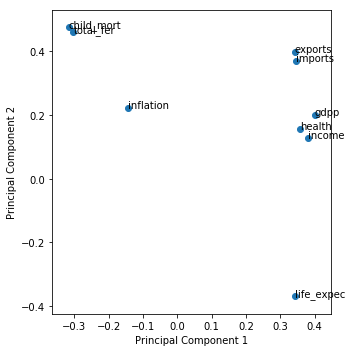

In [350]:
#Checking the loadings against PC1 and PC2
%matplotlib inline
fig = plt.figure(figsize = (5,5))
plt.scatter(pc_feature_df.PC1, pc_feature_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pc_feature_df.Feature):
    plt.annotate(txt, (pc_feature_df.PC1[i],pc_feature_df.PC2[i]))
plt.tight_layout()
plt.show()

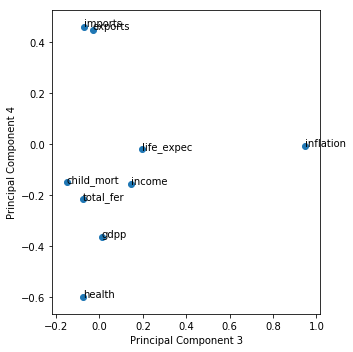

In [351]:
#Checking the loadings against PC3 and PC4
%matplotlib inline
fig = plt.figure(figsize = (5,5))
plt.scatter(pc_feature_df.PC3, pc_feature_df.PC4)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
for i, txt in enumerate(pc_feature_df.Feature):
    plt.annotate(txt, (pc_feature_df.PC3[i],pc_feature_df.PC4[i]))
plt.tight_layout()
plt.show()

In [352]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)
pca_df = pca_final.fit_transform(pca_df)
pca_df

array([[-2.62874118e+00,  1.46767135e+00, -5.44861004e-01,
         2.36555663e-01],
       [-2.37738558e-02, -1.43151051e+00, -9.05242609e-03,
        -4.41593143e-01],
       [-4.57882953e-01, -6.76758610e-01,  9.64949591e-01,
        -1.75860279e-01],
       [-2.71541431e+00,  2.16949335e+00,  5.96001416e-01,
         4.37602700e-01],
       [ 6.46831716e-01, -1.02342010e+00, -2.43438161e-01,
        -2.66711273e-01],
       [ 3.63375066e-02, -6.82569373e-01,  1.46096670e+00,
         6.58696223e-02],
       [-3.33271825e-01, -1.27519742e+00,  1.90199898e-01,
        -4.99931827e-01],
       [ 3.17481317e+00, -2.37658420e-01, -1.68034623e-01,
         1.66468894e+00],
       [ 3.80668849e+00,  2.61826282e-01, -2.96444558e-01,
         9.71483404e-01],
       [-4.66073698e-01, -4.92579135e-01,  6.06780578e-01,
        -2.57741740e-01],
       [ 1.49508322e+00, -4.24607534e-01, -5.56127361e-01,
         2.24293753e-01],
       [ 1.46688131e+00, -3.24757667e-01,  4.25272330e-01,
      

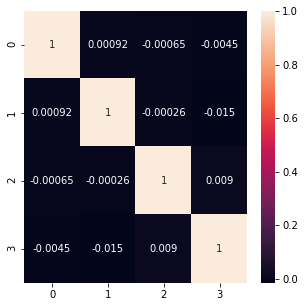

In [353]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_df.transpose())
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (5,5))
sns.heatmap(corrmat,annot = True)

As seen in the above heatmap, all the PCs are highly non-corelated, so we are good to proceed with the Clustering

In [354]:
#pca_df
pca_df = np.transpose(pca_df)
#pca_df
pca_df2 = pd.DataFrame({'PC1':pca_df[0],'PC2':pca_df[1],'PC3':pca_df[2],'PC4':pca_df[3]})
pca_df2

PC1       PC2       PC3       PC4
0   -2.628741  1.467671 -0.544861  0.236556
1   -0.023774 -1.431511 -0.009052 -0.441593
2   -0.457883 -0.676759  0.964950 -0.175860
3   -2.715414  2.169493  0.596001  0.437603
4    0.646832 -1.023420 -0.243438 -0.266711
5    0.036338 -0.682569  1.460967  0.065870
6   -0.333272 -1.275197  0.190200 -0.499932
7    3.174813 -0.237658 -0.168035  1.664689
8    3.806688  0.261826 -0.296445  0.971483
9   -0.466074 -0.492579  0.606781 -0.257742
10   1.495083 -0.424608 -0.556127  0.224294
11   1.466881 -0.324758  0.425272 -0.117610
12  -1.012159 -0.712307 -0.105305 -0.385599
13   0.841985 -1.006874 -0.412313 -0.146078
14  -0.014491 -0.983482  0.891678 -0.503612
15   3.949225  0.835146 -0.294283  0.243161
16  -0.402863 -0.921723 -0.493399 -0.368944
17  -2.357917  1.169720 -1.238256  0.237972
18  -0.713922 -0.768422 -0.123585 -0.361714
19  -1.015874 -0.427898  0.058232 -0.203702
20   0.250452 -1.695560 -0.238128 -0.460853
21  -1.126166  0.399736 -0.237054 -0.137149
22   0.165676 -1.015799  0.273430  0.026504
23   2.690607  0.375698  1.617335  0.305792
24   0.278791 -1.318955 -0.313930 -0.427491
25  -2.744357  1.662123 -0.844210  0.326254
26  -2.755301  1.623950 -0.294770  0.315582
27  -1.176422 -0.493138 -0.567978 -0.346320
28  -2.432583  1.285966 -1.221149  0.194231
29   3.387575 -0.065169 -0.098656  1.569573
..        ...       ...       ...       ...
137 -1.174257  0.354637 -0.532495 -0.094197
138  1.750920 -1.019354  0.080269 -0.091607
139  2.238325 -0.998376 -0.201016  0.707195
140 -0.544729 -0.950298  1.580625 -0.396057
141 -0.225725 -0.985197 -0.162926 -0.401603
142 -2.011360  0.846198  0.695030  0.147090
143 -0.197575 -0.566515  0.038056 -0.197292
144  3.797115  0.385747 -0.270168  1.153059
145  6.247969  1.852844 -0.511879  1.574791
146 -1.372902 -0.166722  0.284385 -0.187607
147 -2.271376  1.004014 -0.398847  0.138675
148  0.172920 -1.397541 -0.000499 -0.521835
149 -2.002246  1.082025  1.382694  0.436575
150 -2.237693  0.902904 -1.185362  0.071784
151 -0.856163 -0.545101 -0.367672 -0.175779
152 -0.062684 -1.280882 -0.078068 -0.388805
153  0.327045 -1.063730  0.265352 -0.038443
154 -0.892803 -0.189966 -0.615669 -0.251520
155 -2.614207  1.458074 -0.407977  0.271817
156 -0.371912 -1.158947  0.665468 -0.552675
157  2.681870  0.539726  0.959377 -0.337258
158  2.599626 -0.365848 -0.178149  1.050659
159  3.776092  0.142196 -0.401483  3.186073
160  0.454195 -1.095916  0.047729 -0.019427
161 -1.028685 -0.565926  0.753652 -0.387717
162 -1.172199 -0.281328 -0.660121 -0.283974
163 -0.312115 -0.016810  3.650159  0.034430
164 -0.592512 -1.081056  0.524866 -0.506592
165 -1.797324  0.583978  1.177102  0.052162
166 -2.637470  1.566778 -0.176887  0.162464

[167 rows x 4 columns]

## Outlier Analysis PC1
plt.boxplot(pca_df2.PC1)
Q1 = pca_df2.PC1.quantile(0.05)
Q3 = pca_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
#IQR
pca_df2 = pca_df2[(pca_df2.PC1 >= Q1) & (pca_df2.PC1 <= Q3)]

## Outlier Analysis PC2
plt.boxplot(pca_df2.PC2)
Q1 = pca_df2.PC2.quantile(0.05)
Q3 = pca_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
#IQR
pca_df2 = pca_df2[(pca_df2.PC2 >= Q1) & (pca_df2.PC2 <= Q3)]

## Outlier Analysis PC3
plt.boxplot(pca_df2.PC3)
Q1 = pca_df2.PC3.quantile(0.05)
Q3 = pca_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
#IQR
pca_df2 = pca_df2[(pca_df2.PC3 >= Q1) & (pca_df2.PC3 <= Q3)]

## Outlier Analysis PC4
plt.boxplot(pca_df2.PC4)
Q1 = pca_df2.PC4.quantile(0.05)
Q3 = pca_df2.PC4.quantile(0.95)
IQR = Q3 - Q1
#IQR
pca_df2 = pca_df2[(pca_df2.PC4 >= Q1) & (pca_df2.PC4 <= Q3)]

pca_df2.shape - (85,4)

__Outlier analysis and treatment was tried on all PCs. However, this ended up removing half the rows. Also, since each row represents a specific country, I recommend to not remove any rows. Hence all the outlier analysis code is commented__

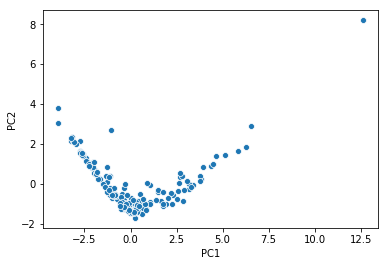

In [355]:
#Visualising the points on the PCs.
sns.scatterplot(x='PC1',y='PC2',data=pca_df2)

In [356]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [357]:
#Check the Hopkins measure
hopkins(pca_df2)

0.9161164529377638

Based on the hopkins score, the dataset is suitable for clustering, hence we will proceed with clustering

In [358]:
country_cluster_df = pca_df2
country_cluster_df.head()

PC1       PC2       PC3       PC4
0 -2.628741  1.467671 -0.544861  0.236556
1 -0.023774 -1.431511 -0.009052 -0.441593
2 -0.457883 -0.676759  0.964950 -0.175860
3 -2.715414  2.169493  0.596001  0.437603
4  0.646832 -1.023420 -0.243438 -0.266711

### Clustering

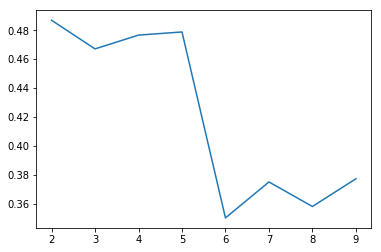

In [359]:
#Silhouette score analysis, try with K = 2 to 10, to decide on the best number of clusters
# Import necessarylibraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(country_cluster_df)
    ss.append([k, silhouette_score(country_cluster_df, kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

_As per this, 2, 4 or 5 seems to be the optimal clusters (based on the max Silhoutte score. We will try with the elbow curve as well_

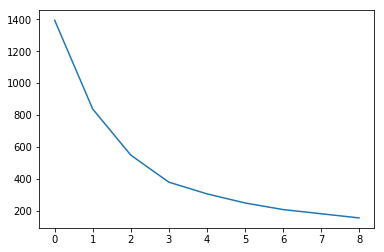

In [360]:
elbow = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_cluster_df)
    elbow.append(model_clus.inertia_)

plt.plot(elbow)

_As per this, 3,4 or 5 seems to be the optimal cluster size. Considering the practical use of the clusters and also the Silhoutte score, we will go with 4 _

In [361]:
#Let's perform K means using K=4
model_clus = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_clus.fit(country_cluster_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [362]:
model_clus.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 3, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 3, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [363]:
temp_df = pca_df2
temp_df.index = pd.RangeIndex(len(temp_df.index))
country_km_df = pd.concat([temp_df, pd.Series(model_clus.labels_)], axis=1)
country_km_df.columns = ['PC1', 'PC2','PC3','PC4','ClusterID']
country_km_df

PC1       PC2       PC3       PC4  ClusterID
0   -2.628741  1.467671 -0.544861  0.236556          2
1   -0.023774 -1.431511 -0.009052 -0.441593          0
2   -0.457883 -0.676759  0.964950 -0.175860          0
3   -2.715414  2.169493  0.596001  0.437603          2
4    0.646832 -1.023420 -0.243438 -0.266711          0
5    0.036338 -0.682569  1.460967  0.065870          0
6   -0.333272 -1.275197  0.190200 -0.499932          0
7    3.174813 -0.237658 -0.168035  1.664689          1
8    3.806688  0.261826 -0.296445  0.971483          1
9   -0.466074 -0.492579  0.606781 -0.257742          0
10   1.495083 -0.424608 -0.556127  0.224294          0
11   1.466881 -0.324758  0.425272 -0.117610          0
12  -1.012159 -0.712307 -0.105305 -0.385599          0
13   0.841985 -1.006874 -0.412313 -0.146078          0
14  -0.014491 -0.983482  0.891678 -0.503612          0
15   3.949225  0.835146 -0.294283  0.243161          1
16  -0.402863 -0.921723 -0.493399 -0.368944          0
17  -2.357917  1.169720 -1.238256  0.237972          2
18  -0.713922 -0.768422 -0.123585 -0.361714          0
19  -1.015874 -0.427898  0.058232 -0.203702          0
20   0.250452 -1.695560 -0.238128 -0.460853          0
21  -1.126166  0.399736 -0.237054 -0.137149          2
22   0.165676 -1.015799  0.273430  0.026504          0
23   2.690607  0.375698  1.617335  0.305792          1
24   0.278791 -1.318955 -0.313930 -0.427491          0
25  -2.744357  1.662123 -0.844210  0.326254          2
26  -2.755301  1.623950 -0.294770  0.315582          2
27  -1.176422 -0.493138 -0.567978 -0.346320          0
28  -2.432583  1.285966 -1.221149  0.194231          2
29   3.387575 -0.065169 -0.098656  1.569573          1
..        ...       ...       ...       ...        ...
137 -1.174257  0.354637 -0.532495 -0.094197          2
138  1.750920 -1.019354  0.080269 -0.091607          0
139  2.238325 -0.998376 -0.201016  0.707195          1
140 -0.544729 -0.950298  1.580625 -0.396057          0
141 -0.225725 -0.985197 -0.162926 -0.401603          0
142 -2.011360  0.846198  0.695030  0.147090          2
143 -0.197575 -0.566515  0.038056 -0.197292          0
144  3.797115  0.385747 -0.270168  1.153059          1
145  6.247969  1.852844 -0.511879  1.574791          1
146 -1.372902 -0.166722  0.284385 -0.187607          0
147 -2.271376  1.004014 -0.398847  0.138675          2
148  0.172920 -1.397541 -0.000499 -0.521835          0
149 -2.002246  1.082025  1.382694  0.436575          2
150 -2.237693  0.902904 -1.185362  0.071784          2
151 -0.856163 -0.545101 -0.367672 -0.175779          0
152 -0.062684 -1.280882 -0.078068 -0.388805          0
153  0.327045 -1.063730  0.265352 -0.038443          0
154 -0.892803 -0.189966 -0.615669 -0.251520          0
155 -2.614207  1.458074 -0.407977  0.271817          2
156 -0.371912 -1.158947  0.665468 -0.552675          0
157  2.681870  0.539726  0.959377 -0.337258          1
158  2.599626 -0.365848 -0.178149  1.050659          1
159  3.776092  0.142196 -0.401483  3.186073          1
160  0.454195 -1.095916  0.047729 -0.019427          0
161 -1.028685 -0.565926  0.753652 -0.387717          0
162 -1.172199 -0.281328 -0.660121 -0.283974          0
163 -0.312115 -0.016810  3.650159  0.034430          0
164 -0.592512 -1.081056  0.524866 -0.506592          0
165 -1.797324  0.583978  1.177102  0.052162          2
166 -2.637470  1.566778 -0.176887  0.162464          2

[167 rows x 5 columns]

In [364]:
country_km_df['ClusterID'].value_counts()

0    87
2    48
1    30
3     2
Name: ClusterID, dtype: int64

In [365]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=country_km_df)

In [366]:
clustered_df =pd.merge(country_base_df,country_km_df, left_index=True,right_index=True)
#clustered_df.head()
clustered_df=clustered_df.drop(['PC1','PC2','PC3','PC4'],axis=1)
clustered_df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  ClusterID  
0       9.44        56.2       5.82    553          2  
1       4.49        76.3       1.65   4090          0  
2      16.10        76.5       2.89   4460          0  
3      22.40        60.1       6.16   3530          2  
4       1.44        76.8       2.13  12200          0

##### Analysis

In [367]:
gdpp_df = pd.DataFrame(clustered_df.groupby(["ClusterID"]).gdpp.mean())
cmort_df = pd.DataFrame(clustered_df.groupby(["ClusterID"]).child_mort.mean())
income_df = pd.DataFrame(clustered_df.groupby(["ClusterID"]).income.mean())
income_df

income
ClusterID              
0          13297.586207
1          45180.000000
2           3897.354167
3          81900.000000

In [368]:
mean_df = pd.concat([gdpp_df,cmort_df,income_df], axis=1)
mean_df

gdpp  child_mort        income
ClusterID                                        
0           7158.298851   21.113793  13297.586207
1          43300.000000    5.043333  45180.000000
2           1909.208333   91.610417   3897.354167
3          75800.000000    2.800000  81900.000000

__Based on this, Cluster 1 & 3 seems to be the developed countries and hence do not need any assistance. Clusters 0 and 2 need attention. We wil analyse this further__

In [369]:
#Comparing the clusters wrt the features GDPP and Child Mortality
sns.scatterplot(x='gdpp',y='child_mort',data=clustered_df)

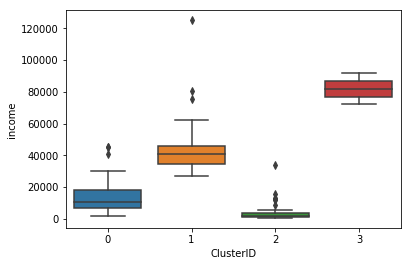

In [370]:
#Comparing the clusters wrt the features GDPP and income
sns.boxplot(x='ClusterID',y='income',data=clustered_df)

In [371]:
#Comparing the clusters wrt the features GDPP and income
sns.boxplot(x='ClusterID', y='gdpp', data=clustered_df)

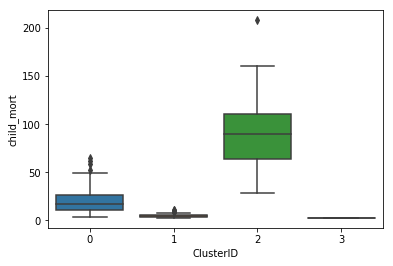

In [372]:
#Comparing the clusters wrt the features Child Mortality
sns.boxplot(x='ClusterID', y='child_mort', data=clustered_df)

#### Heirarchical Clustering

In [373]:
country_cluster_df.head()

PC1       PC2       PC3       PC4
0 -2.628741  1.467671 -0.544861  0.236556
1 -0.023774 -1.431511 -0.009052 -0.441593
2 -0.457883 -0.676759  0.964950 -0.175860
3 -2.715414  2.169493  0.596001  0.437603
4  0.646832 -1.023420 -0.243438 -0.266711

In [374]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# single linkage
mergings = linkage(country_cluster_df, method="single", metric='euclidean')
dendrogram(mergings)
fig = plt.figure(figsize = (20,20))
plt.show()

<Figure size 1440x1440 with 0 Axes>

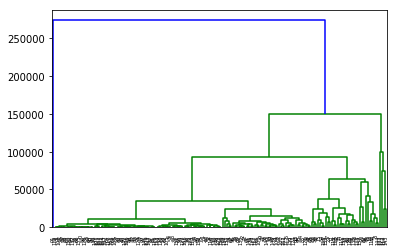

In [375]:
# complete linkage
mergings = linkage(df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [376]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
# assign cluster labels
clustered_df['ClusterLabels'] = cluster_labels
clustered_df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  ClusterID  ClusterLabels  
0       9.44        56.2       5.82    553          2              0  
1       4.49        76.3       1.65   4090          0              0  
2      16.10        76.5       2.89   4460          0              0  
3      22.40        60.1       6.16   3530          2              0  
4       1.44        76.8       2.13  12200          0              0

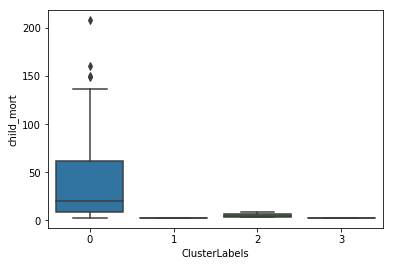

In [377]:
# plots
sns.boxplot(x='ClusterLabels', y='child_mort', data=clustered_df)

In [378]:
# plots
sns.boxplot(x='ClusterLabels', y='income', data=clustered_df)

In [379]:
clustered_df['ClusterID'].value_counts()

0    87
2    48
1    30
3     2
Name: ClusterID, dtype: int64

In [380]:
clustered_df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  ClusterID  ClusterLabels  
0       9.44        56.2       5.82    553          2              0  
1       4.49        76.3       1.65   4090          0              0  
2      16.10        76.5       2.89   4460          0              0  
3      22.40        60.1       6.16   3530          2              0  
4       1.44        76.8       2.13  12200          0              0

In [381]:
cluster_1 = clustered_df.loc[(clustered_df.ClusterID == 2), ['country','ClusterID','gdpp', 'income','child_mort']]
cluster_1.sort_values(by=['child_mort', 'income','gdpp'],ascending=False)

country  ClusterID   gdpp  income  child_mort
66                      Haiti          2    662    1500       208.0
132              Sierra Leone          2    399    1220       160.0
32                       Chad          2    897    1930       150.0
31   Central African Republic          2    446     888       149.0
97                       Mali          2    708    1870       137.0
113                   Nigeria          2   2330    5150       130.0
112                     Niger          2    348     814       123.0
3                      Angola          2   3530    5900       119.0
25               Burkina Faso          2    575    1430       116.0
37           Congo, Dem. Rep.          2    334     609       116.0
64              Guinea-Bissau          2    547    1390       114.0
49          Equatorial Guinea          2  17100   33700       111.0
40              Cote d'Ivoire          2   1220    2690       111.0
17                      Benin          2    758    1820       111.0
63                     Guinea          2    648    1190       109.0
28                   Cameroon          2   1310    2660       108.0
106                Mozambique          2    419     918       101.0
87                    Lesotho          2   1170    2380        99.7
99                 Mauritania          2   1200    3320        97.4
26                    Burundi          2    231     764        93.6
116                  Pakistan          2   1040    4280        92.1
94                     Malawi          2    459    1030        90.5
150                      Togo          2    488    1210        90.3
0                 Afghanistan          2    553    1610        90.2
88                    Liberia          2    327     700        89.3
36                    Comoros          2    769    1410        88.2
166                    Zambia          2   1460    3280        83.1
155                    Uganda          2    595    1540        81.0
56                     Gambia          2    562    1660        80.3
84                        Lao          2   1140    3980        78.9
142                     Sudan          2   1480    3370        76.7
59                      Ghana          2   1310    3060        74.7
147                  Tanzania          2    702    2090        71.9
129                   Senegal          2   1000    2180        66.8
38                Congo, Rep.          2   2740    5190        63.9
55                      Gabon          2   8750   15400        63.7
126                    Rwanda          2    563    1350        63.6
81                   Kiribati          2   1490    1730        62.7
149               Timor-Leste          2   3600    1850        62.6
80                      Kenya          2    967    2480        62.2
93                 Madagascar          2    413    1390        62.2
165                     Yemen          2   1310    4480        56.3
108                   Namibia          2   5190    8460        56.0
50                    Eritrea          2    482    1420        55.2
137              South Africa          2   7280   12000        53.7
21                   Botswana          2   6350   13300        52.5
72                       Iraq          2   4500   12700        36.9
136           Solomon Islands          2   1290    1780        28.1

In [382]:
cluster_0 = clustered_df.loc[(clustered_df.ClusterID == 0), ['country','ClusterID','gdpp', 'income','child_mort']]
cluster_0.sort_values(by=['child_mort', 'income','gdpp'],ascending=False)

country  ClusterID   gdpp  income  child_mort
107                 Myanmar          0    988    3720        64.4
154            Turkmenistan          0   4440    9940        62.0
69                    India          0   1350    4410        58.8
146              Tajikistan          0    738    2110        52.4
12               Bangladesh          0    758    2440        49.4
109                   Nepal          0    592    1990        47.0
19                  Bolivia          0   1980    5410        46.6
27                 Cambodia          0    786    2520        44.4
18                   Bhutan          0   2180    6420        42.7
101   Micronesia, Fed. Sts.          0   2860    3340        40.0
9                Azerbaijan          0   5840   16000        39.2
65                   Guyana          0   3040    5840        37.6
161              Uzbekistan          0   1380    4240        36.3
62                Guatemala          0   2830    6710        35.4
45       Dominican Republic          0   5450   11100        34.4
105                 Morocco          0   2830    6440        33.5
70                Indonesia          0   3110    8430        33.3
120             Philippines          0   2130    5600        31.9
83          Kyrgyz Republic          0    880    2790        29.6
162                 Vanuatu          0   2970    2950        29.2
47                    Egypt          0   2600    9860        29.1
2                   Algeria          0   4460   12900        27.3
30               Cape Verde          0   3310    5830        26.5
103                Mongolia          0   2650    7710        26.1
46                  Ecuador          0   4660    9350        25.1
143                Suriname          0   8300   14200        24.1
52                     Fiji          0   3650    7350        24.1
118                Paraguay          0   3230    7290        24.1
164                 Vietnam          0   1310    4490        23.3
79               Kazakhstan          0   9070   20100        21.5
..                      ...        ...    ...     ...         ...
13                 Barbados          0  16000   15300        14.2
10                  Bahamas          0  28000   22900        13.8
96                 Maldives          0   7100   10500        13.2
115                    Oman          0  19300   45300        11.7
156                 Ukraine          0   2970    7820        11.7
124                 Romania          0   8230   17800        11.5
140               Sri Lanka          0   2810    8560        11.2
24                 Bulgaria          0   6840   15300        10.8
160                 Uruguay          0  11900   17100        10.6
92           Macedonia, FYR          0   4540   11400        10.4
4       Antigua and Barbuda          0  12200   19100        10.3
86                  Lebanon          0   8860   16300        10.3
39               Costa Rica          0   8200   13000        10.2
125                  Russia          0  10700   23100        10.0
33                    Chile          0  12900   19400         8.7
11                  Bahrain          0  20700   41100         8.6
95                 Malaysia          0   9070   21100         7.9
85                   Latvia          0  11300   18300         7.8
130                  Serbia          0   5410   12700         7.6
134         Slovak Republic          0  16600   25200         7.0
20   Bosnia and Herzegovina          0   4610    9720         6.9
104              Montenegro          0   6680   14000         6.8
90                Lithuania          0  12000   21100         6.1
67                  Hungary          0  13100   22300         6.0
121                  Poland          0  12600   21800         6.0
41                  Croatia          0  13500   20100         5.5
14                  Belarus          0   6030   16200         5.5
51                  Estonia          0  14600   22700         4.5
138             South Korea          0  22100   30400       